In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook  
%matplotlib inline

In [2]:
# Set directory
datadir = "C:/Users/amant/Documents/Projects/Color Enhancement/" # change this
indir = datadir + "inputs/"
outdir = datadir + "outputs/"

# Color Enhancement

Here, we'll take a look at histogram equalization and gamma correction to enhance image colors.

In [3]:
import color_enhance

## Histogram Equalization

Histogram equalization can enhance the color profile of an image that is dominated by one color.

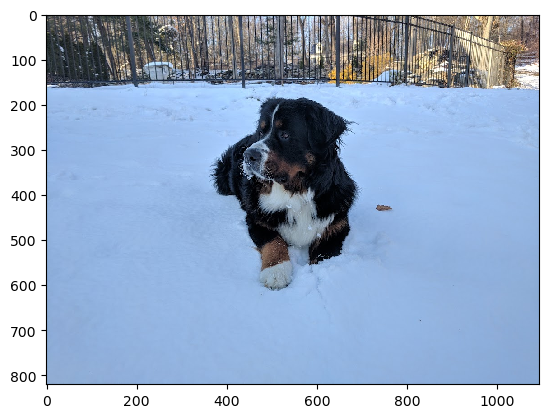

In [6]:
im_file = indir + 'cosmosnow.jpg'

im = np.float32(cv2.imread(im_file))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im/255)

The original image of my dog, Cosmo, is quite blue. We can visualize the color histograms in the following plot:

Text(0.5, 1.0, 'Color Histograms of Original Image')

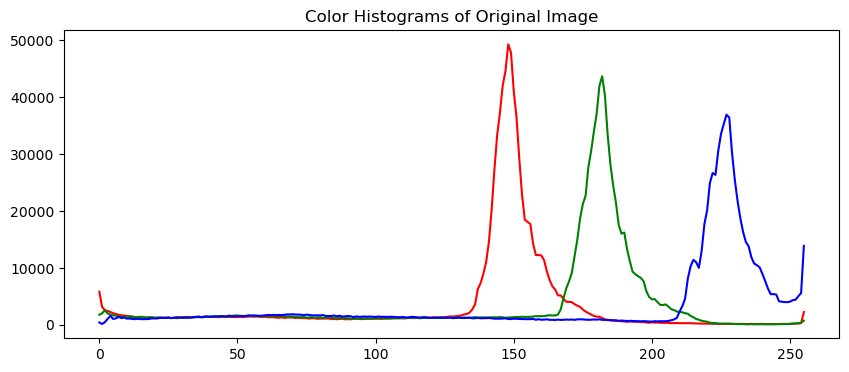

In [7]:
h, c = color_enhance.histograms(im)

plt.figure(figsize=(10,4))
plt.plot(h[0],'r')
plt.plot(h[1],'g')
plt.plot(h[2],'b')
plt.title("Color Histograms of Original Image")

As we can see, blue is more prevalent at higher intensities compared to green and red. Let's see how color enhancement can help:

In [8]:
# Get 5 levels of hist equalization for visualization

im_new_low = color_enhance.hist_eq(im, 0.1)
print("Done")
im_new_mild = color_enhance.hist_eq(im, 0.3)
print("Done")
im_new_med = color_enhance.hist_eq(im, 0.5)
print("Done")
im_new_high = color_enhance.hist_eq(im, 0.7)
print("Done")
im_new_max = color_enhance.hist_eq(im, 1)
print("Done")

Done
Done
Done
Done
Done


Text(0.5, 1.0, 'Max Hist Eq Image')

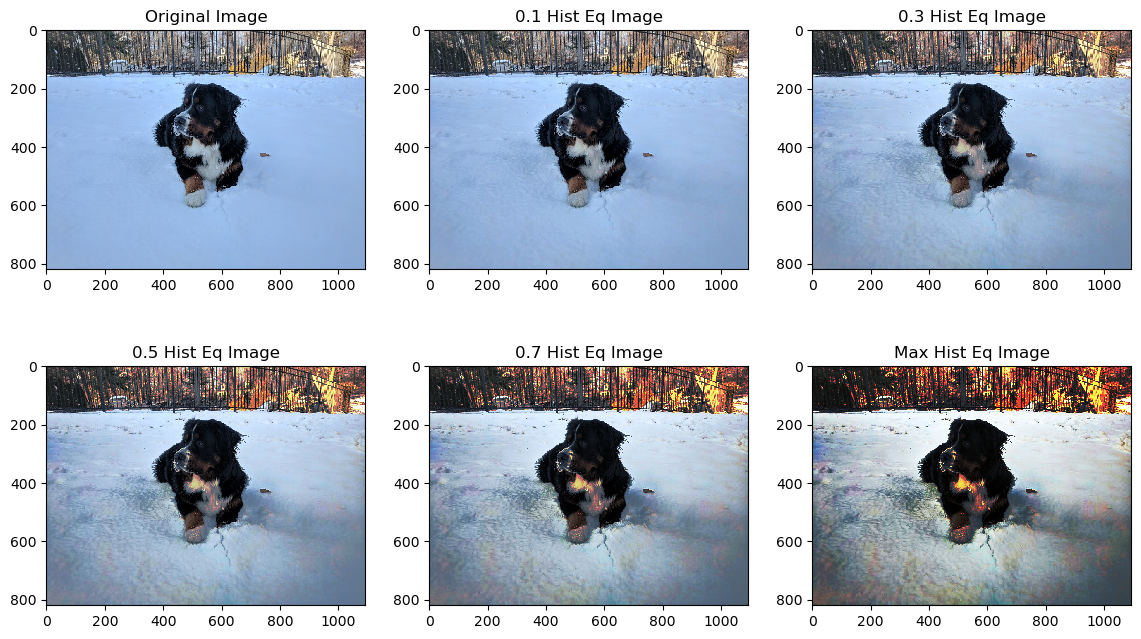

In [9]:
plt.figure(figsize=(14,8))

plt.subplot(231)
plt.imshow(im/255)
plt.title("Original Image")

plt.subplot(232)
plt.imshow(im_new_low/255)
plt.title("0.1 Hist Eq Image")

plt.subplot(233)
plt.imshow(im_new_mild/255)
plt.title("0.3 Hist Eq Image")

plt.subplot(234)
plt.imshow(im_new_med/255)
plt.title("0.5 Hist Eq Image")

plt.subplot(235)
plt.imshow(im_new_high/255)
plt.title("0.7 Hist Eq Image")

plt.subplot(236)
plt.imshow(im_new_max/255)
plt.title("Max Hist Eq Image")

Higher levels give very degraded images, which while being more color balanced, look really bad. We can visualize some of these histograms again:

Text(0.5, 1.0, 'Histograms for max equalization')

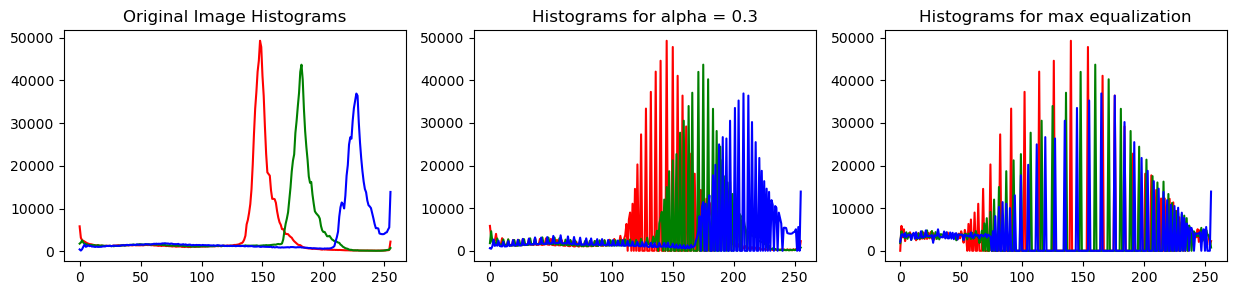

In [10]:
h01,_ = color_enhance.histograms(im_new_mild)
h10,_ = color_enhance.histograms(im_new_max)

plt.figure(figsize=(15,3))

plt.subplot(131)
plt.plot(h[0],'r')
plt.plot(h[1],'g')
plt.plot(h[2],'b')
plt.title("Original Image Histograms")

plt.subplot(132)
plt.plot(h01[0],'r')
plt.plot(h01[1],'g')
plt.plot(h01[2],'b')
plt.title("Histograms for alpha = 0.3")

plt.subplot(133)
plt.plot(h10[0],'r')
plt.plot(h10[1],'g')
plt.plot(h10[2],'b')
plt.title("Histograms for max equalization")

As we can see, as we increase alpha, the histograms tend to be more balanced. I like the result from alpha = 0.1 the best, so I'll save that.

In [11]:
# Save color balanced image
im_new_low = im_new_low.astype(np.float32)
im_bal = cv2.cvtColor(im_new_low, cv2.COLOR_RGB2BGR)
cv2.imwrite(outdir + "cosmo_histeq.jpg", im_bal)

True

## Gamma Correction

Another method for color enhancement is simply to perform gamma correction on the saturation channel of an image. This can boost lower saturated values of an image, making it look more vibrant.

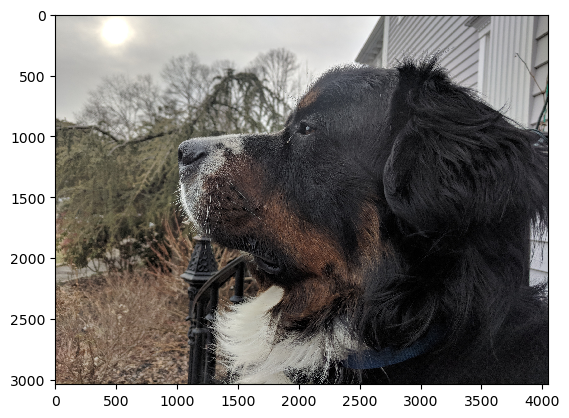

In [12]:
im_file = indir + 'cosmo_dull.jpg'

im = np.float32(cv2.imread(im_file))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im/255)

The original image is quite dull and grey, so let's see what gamma correction can do to boost its saturation:

In [13]:
# Get 5 levels of gamma correction for visualization

gam03 = color_enhance.gamma_correct(im, 0.3)
gam05 = color_enhance.gamma_correct(im, 0.5)
gam07 = color_enhance.gamma_correct(im, 0.7)
gam09 = color_enhance.gamma_correct(im, 0.9)
gam13 = color_enhance.gamma_correct(im, 1.3)

Text(0.5, 1.0, 'Gamma = 1.3')

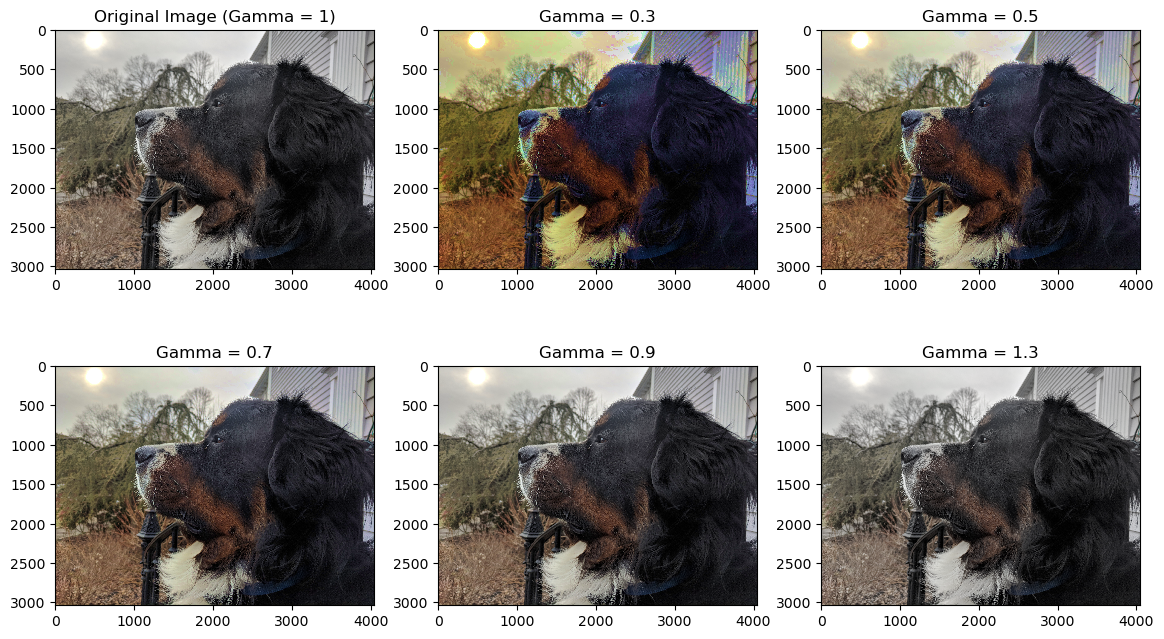

In [14]:
plt.figure(figsize=(14,8))

plt.subplot(231)
plt.imshow(im/255)
plt.title("Original Image (Gamma = 1)")

plt.subplot(232)
plt.imshow(gam03/255)
plt.title("Gamma = 0.3")

plt.subplot(233)
plt.imshow(gam05/255)
plt.title("Gamma = 0.5")

plt.subplot(234)
plt.imshow(gam07/255)
plt.title("Gamma = 0.7")

plt.subplot(235)
plt.imshow(gam09/255)
plt.title("Gamma = 0.9")

plt.subplot(236)
plt.imshow(gam13/255)
plt.title("Gamma = 1.3")

Gamma correction raises the channel to the power of gamma - if we look at a graph of $x^{\gamma}$ for varying levels of gamma and for x between 0 and 1, we can see that lower values of gamma will boost lower saturation values, while higher values of gamma will boost higher saturation values. This can be seen in the plot below, and is is why lower gammas have much higher saturation:

Text(0, 0.5, 'Gamma Corrected Values')

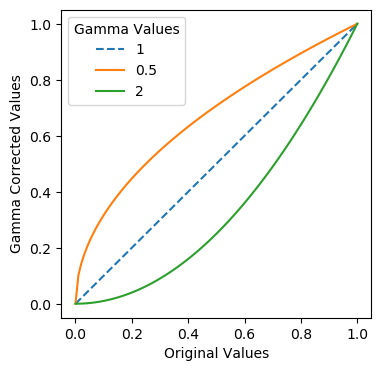

In [15]:
x = np.linspace(0,1,100)
y = x
y_03 = x ** 0.5
y_13 = x ** 2

plt.figure(figsize=(4,4))
plt.plot(x,y,'--',label='1')
plt.plot(x,y_03,label='0.5')
plt.plot(x,y_13,label='2')
plt.legend(title="Gamma Values")
plt.xlabel("Original Values")
plt.ylabel("Gamma Corrected Values")

I like the result for gamma = 0.7 the best, so I'll save that result.

In [16]:
# Save gamma corrected image
im_new = gam07.astype(np.float32)
im_new = cv2.cvtColor(im_new, cv2.COLOR_RGB2BGR)
cv2.imwrite(outdir + "cosmo_gamma.jpg", im_new)

True